In [24]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv('./Iris.csv')

In [26]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df = df.iloc[:,1:]

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [30]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df = df[df['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]

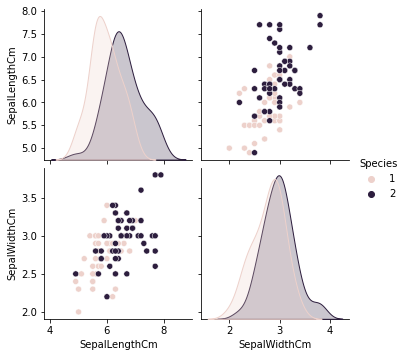

In [32]:
import seaborn as sns
sns.pairplot(df,hue='Species')

In [34]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [37]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()

estimators = [('clf1',clf1),('clf2',clf2),('clf3',clf3)]

In [40]:
for estimator in estimators:
    acc = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.mean(acc))

clf1 0.75
clf2 0.65
clf3 0.6


### Hard Voting

In [46]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators,voting='hard')
acc = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.mean(acc))

0.65


### Soft Voting

In [48]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators,voting='soft')
acc = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(acc),2))

0.64


### Weighted Voting

In [51]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators,voting='soft',weights=[i,j,k])
            acc = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(acc),2))

for i=1,j=1,k=1 0.64
for i=1,j=1,k=2 0.64
for i=1,j=1,k=3 0.63
for i=1,j=2,k=1 0.64
for i=1,j=2,k=2 0.64
for i=1,j=2,k=3 0.62
for i=1,j=3,k=1 0.64
for i=1,j=3,k=2 0.62
for i=1,j=3,k=3 0.63
for i=2,j=1,k=1 0.68
for i=2,j=1,k=2 0.67
for i=2,j=1,k=3 0.65
for i=2,j=2,k=1 0.66
for i=2,j=2,k=2 0.65
for i=2,j=2,k=3 0.66
for i=2,j=3,k=1 0.66
for i=2,j=3,k=2 0.63
for i=2,j=3,k=3 0.65
for i=3,j=1,k=1 0.72
for i=3,j=1,k=2 0.7
for i=3,j=1,k=3 0.64
for i=3,j=2,k=1 0.7
for i=3,j=2,k=2 0.67
for i=3,j=2,k=3 0.67
for i=3,j=3,k=1 0.69
for i=3,j=3,k=2 0.64
for i=3,j=3,k=3 0.65
